# Data exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
joint_data = pd.read_csv('joint_data.csv') # note to correct spelling of 'joint' at some point

In [3]:
pd.set_option("display.max_rows", 100, "display.max_columns", None)

joint_data

,Unnamed: 0,route_id,route_linestring,num_of_waypoint,waypoint_longitude,waypoint_latitude,poi_lat_lgt,poi_longitude,poi_latitude,poi_category,poi_name,distance
0,0,113043,"LINESTRING (13.69072 52.45147, 13.69075 52.451...",133,13.67734,52.43849,POINT (13.6774745 52.4385208),13.677475,52.438521,['viewpoint'],Müggeleck,0.000138
1,1,113043,"LINESTRING (13.69072 52.45147, 13.69075 52.451...",282,13.62759,52.44386,POINT (13.6279051 52.444312),13.627905,52.444312,['bench'],NaN,0.000551
2,2,113043,"LINESTRING (13.69072 52.45147, 13.69075 52.451...",288,13.62704,52.44442,POINT (13.6271595 52.4444457),13.627159,52.444446,['bench'],NaN,0.000122
3,3,113043,"LINESTRING (13.69072 52.45147, 13.69075 52.451...",288,13.62704,52.44442,POINT (13.6269487 52.4444808),13.626949,52.444481,['bench'],NaN,0.000110
4,4,113043,"LINESTRING (13.69072 52.45147, 13.69075 52.451...",292,13.62716,52.44509,POINT (13.6273851 52.4453161),13.627385,52.445316,['bench'],NaN,0.000319
...,...,...,...,...,...,...,...,...,...,...,...,...
91099,91099,3674009,"LINESTRING (13.21284 52.53883, 13.21286 52.538...",388,13.28369,52.58943,POINT (13.2834619 52.5895611),13.283462,52.589561,['tree'],NaN,0.000263
91100,91100,3674009,"LINESTRING (13.21284 52.53883, 13.21286 52.538...",388,13.28369,52.58943,POINT (13.2843859 52.5890324),13.284386,52.589032,['tree'],NaN,0.000801
91101,91101,3674009,"LINESTRING (13.21284 52.53883, 13.21286 52.538...",388,13.28369,52.58943,POINT (13.2844894 52.5889504),13.284489,52.588950,['tree'],NaN,0.000932
91102,91102,3674128,"LINESTRING (13.26176 52.4888, 13.2618 52.48877...",281,13.19110,52.45177,POINT (13.191308 52.451652),13.191308,52.451652,['tree'],NaN,0.000239


Creating a subset which gives the number of POIs per route

In [32]:
poi_per_route = joint_data.groupby( ["route_id"] ).size().to_frame(name = 'poi_count').reset_index()
poi_per_route.sort_values(by='poi_count', ascending=False, inplace=True)
poi_per_route.reset_index(inplace=True)
poi_per_route

,index,route_id,poi_count
0,277,3547573,3171
1,74,2379991,2597
2,412,3670488,2355
3,203,3470257,1924
4,294,3562051,1764
5,368,3640286,1518
6,408,3667853,1503
7,202,3469623,1451
8,352,3619989,1404
9,211,3481741,1361


In [13]:
poi_per_route.poi_count.describe()

count     430.000000
mean      211.869767
std       369.018893
min         1.000000
25%        14.000000
50%        62.000000
75%       256.250000
max      3171.000000
Name: poi_count, dtype: float64

The **mean** number of POI per route is 211, however the **median** is 62, meaning the routes are heavily **skewed**. There seem to be outliers on both ends, however, since the smallest number of poi = 1 

#### Plotting the number of POI per route

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

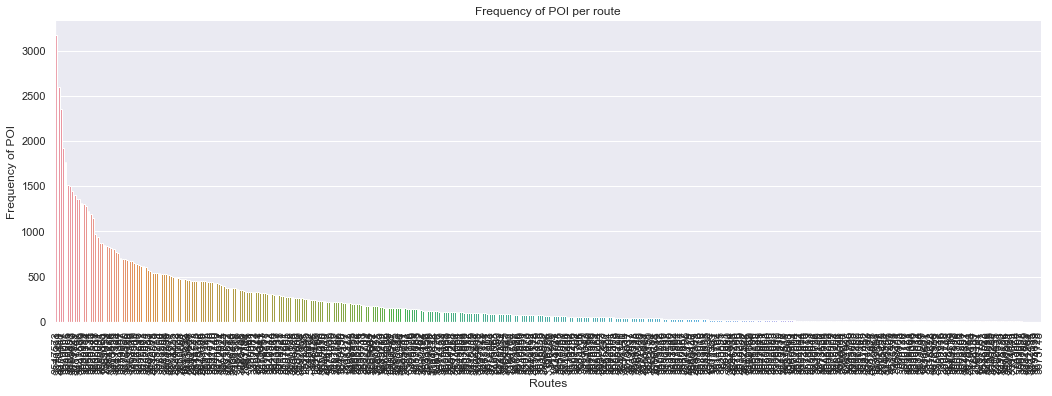

In [38]:
plt.figure()
ax = sns.catplot(data=poi_per_route, x="route_id",
                 y="poi_count", kind="bar",
                 order = poi_per_route.sort_values(by='poi_count', ascending=False).route_id, 
                  
                 aspect=3)

locs, labels = plt.xticks()
ax.set(title = "Frequency of POI per route",
       xlabel = "Routes",
       ylabel = "Frequency of POI")
plt.setp(labels, rotation=90)

plt.show

Creating an overview of the spread of categories

In [5]:
category_counts = joint_data.groupby( ["poi_category"] ).size().to_frame(name = 'category_count').reset_index()
category_counts = category_counts.sort_values(by='category_count', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

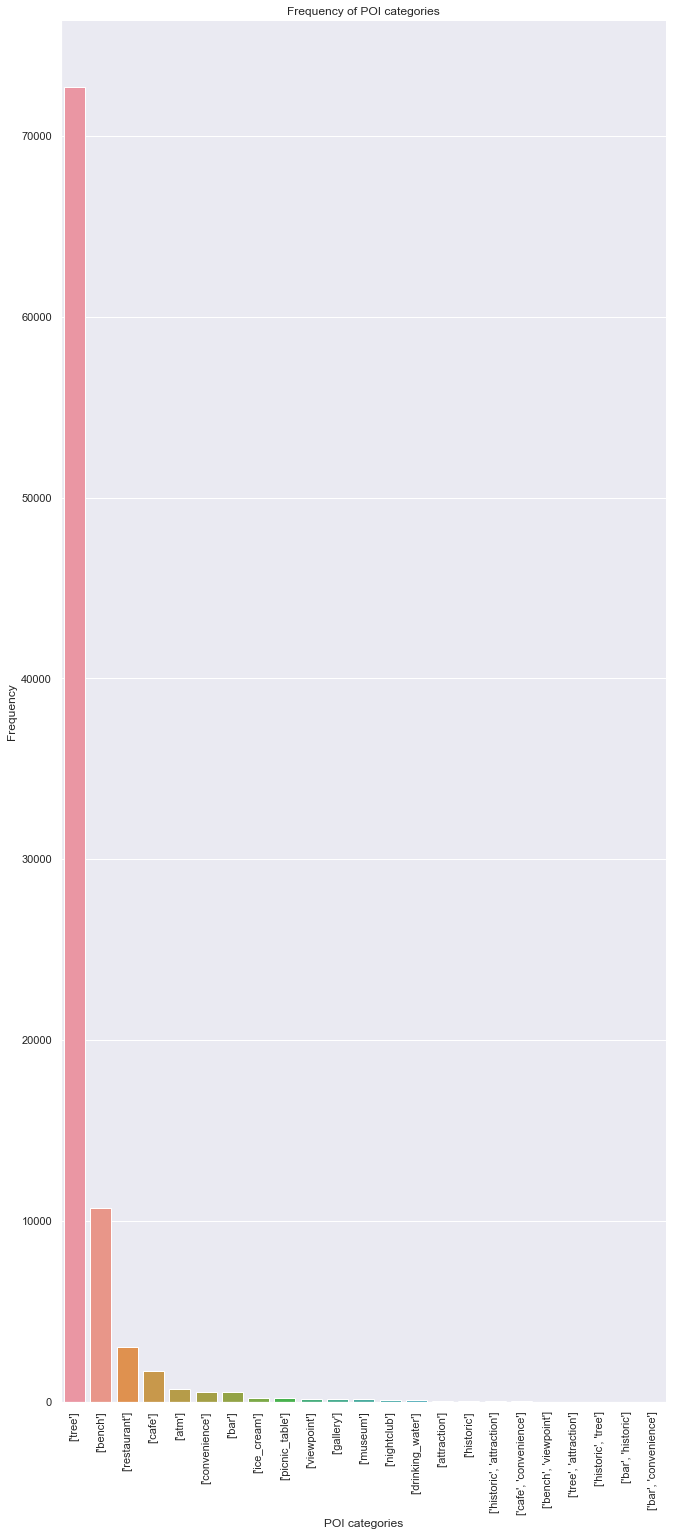

In [6]:
plt.figure()
ax = sns.catplot(data=category_counts, x="poi_category", y="category_count", kind="bar", height=20, aspect=0.5)
locs, labels = plt.xticks()
ax.set(title = "Frequency of POI categories",
       xlabel = "POI categories",
       ylabel = "Frequency")
plt.setp(labels, rotation=90)

plt.show

In [7]:
route_grp = joint_data.groupby(['route_id'])
len(route_grp)

430

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
route_grp['poi_category'].value_counts().iloc[0]

29

In [10]:
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])

NameError: name 'df' is not defined

### Ideas

- plot the number of POIs against number of waypoints, for the whole dataset, and see if there is a correlation there, and whether we have some interesting outliers (super 'interesting' or super 'boring' routes)

- display distribution of categories
    - across how many routes is each category spread?
- What is the average number of trees per route?
    - Does every route have trees?
    - What is the cut off for a green route?